In [54]:
#### Data Science Problem Statement

##Predict if the client will subscribe to a term deposit based on the analysis of the marketing campaigns the bank performed.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

In [2]:
import os
#os.chdir('/home/greyatom/hackathon_sample/')
os.listdir()

['.ipynb_checkpoints', 'Untitled.ipynb', 'Untitled1.ipynb']

In [3]:
## Data Loading and Cleaning

path = 'C:\\Users\\KARISHMA\\Desktop\\data\\train.csv'
dataframe = pd.read_csv(path,delimiter=',')
dataframe.drop('Id',axis=1,inplace=True)

print('Shape of the data is: ',dataframe.shape)

dataframe.head()


Shape of the data is:  (32950, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,-1.7,94.215,-40.3,0.870,4991.6,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no


In [4]:
###Check Numeric and Categorical Features

# IDENTIFYING NUMERICAL FEATURES

numeric_col = dataframe.select_dtypes(include=np.number).columns.tolist()
# select_dtypes selects data with numeric features
                                                                          
# we will store the numeric features in a variable

print("Numeric Features:")
print(dataframe[numeric_col].head())
print("===="*20)



# IDENTIFYING CATEGORICAL FEATURES
categorical_col = dataframe.select_dtypes(exclude=np.number).columns.tolist() # we will exclude data with numeric features
                                                                              # we will store the categorical features in a variable


print("Categorical Features:")
print(dataframe[categorical_col].head())
print("===="*20)


# CHECK THE DATATYPES OF ALL COLUMNS:
    
print(dataframe.dtypes)



Numeric Features:
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   49       227         4    999         0          -0.1          93.200   
1   37       202         2    999         1          -0.1          93.200   
2   78      1148         1    999         0          -1.7          94.215   
3   36       120         2    999         0           1.1          93.994   
4   59       368         2    999         0          -2.9          92.963   

   cons.conf.idx  euribor3m  nr.employed  
0          -42.0      4.120       5195.8  
1          -42.0      4.120       5195.8  
2          -40.3      0.870       4991.6  
3          -36.4      4.857       5191.0  
4          -40.8      1.262       5076.2  
Categorical Features:
            job   marital          education  default housing loan    contact  \
0   blue-collar   married           basic.9y  unknown      no   no   cellular   
1  entrepreneur   married  university.degree       no      no   no  telephone

In [5]:
# CHECK MISSING DATA

# To identify the number of missing values in every feature

# Finding the total missing values and arranging them in ascending order
total = dataframe.isnull().sum().sort_values(ascending=False)

# Converting the missing values in percentage
percent = (dataframe.isnull().sum()/dataframe.isnull().count()).sort_values(ascending=False)

# Concatenating both the dataframes
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                Total  Percent
y                   0      0.0
day_of_week         0      0.0
job                 0      0.0
marital             0      0.0
education           0      0.0
default             0      0.0
housing             0      0.0
loan                0      0.0
contact             0      0.0
month               0      0.0
duration            0      0.0
nr.employed         0      0.0
campaign            0      0.0
pdays               0      0.0
previous            0      0.0
poutcome            0      0.0
emp.var.rate        0      0.0
cons.price.idx      0      0.0
cons.conf.idx       0      0.0
euribor3m           0      0.0
age                 0      0.0


In [6]:
#DROPPING MISSING VALUES

# dropping features having missing values more than 60%
dataframe = dataframe.drop((missing_data[missing_data['Percent'] > 0.6]).index,axis= 1)

# checking null values
print(dataframe.isnull().sum().sort_values(ascending = False))

y                 0
day_of_week       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
age               0
dtype: int64


In [7]:
# FILL NULL VALUES IN CONTINOUS FEATURES

# Code to impute missing values with mean or median
nulls = pd.DataFrame(dataframe.isnull().sum().sort_values(ascending=False))
nulls = nulls[nulls>0]
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
    
# imputing missing values with mean
for column in nulls[nulls["Null Count"]> 0].index:
    dataframe[column].fillna(dataframe[column].mean(), inplace = True)
    
#   imputing with median
#   dataframe[column].fillna(dataframe[column].median(), inplace = True) 

In [8]:
# CHECK FOR CLASS IMBALANCE

# we are finding the percentage of each class in the feature 'y'
class_values = (dataframe['y'].value_counts()/dataframe['y'].value_counts().sum())*100
print(class_values)

no     88.734446
yes    11.265554
Name: y, dtype: float64


In [9]:
# DETECT OUTLIERS IN CONTINOUS COLUMNS

cols = list(dataframe) # A List of all features

outliers = pd.DataFrame(columns=['Feature','Number of Outliers']) # Creating a new dataframe to

for column in cols: # Iterating thorough each feature
    if column in dataframe.select_dtypes(include=np.number).columns: # checking if the feature contains numeric data
            
            # first quartile (Q1)
        q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
        q3 = dataframe[column].quantile(0.75)
            
            # IQR
        iqr = q3 - q1
            
        fence_low = q1 - (1.5*iqr)
        fence_high = q3 + (1.5*iqr)
        
        outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
outliers

,Feature,Number of Outliers
0,age,368
1,duration,2366
2,campaign,1916
3,pdays,1226
4,previous,4534
5,emp.var.rate,0
6,cons.price.idx,0
7,cons.conf.idx,359
8,euribor3m,0
9,nr.employed,0


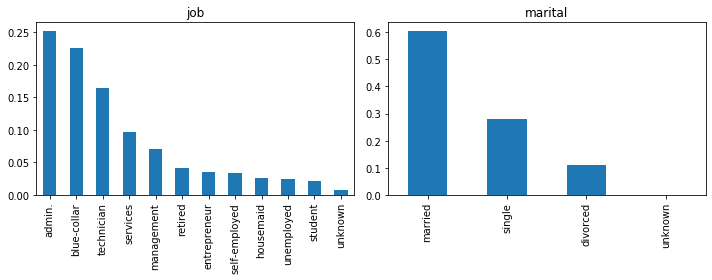

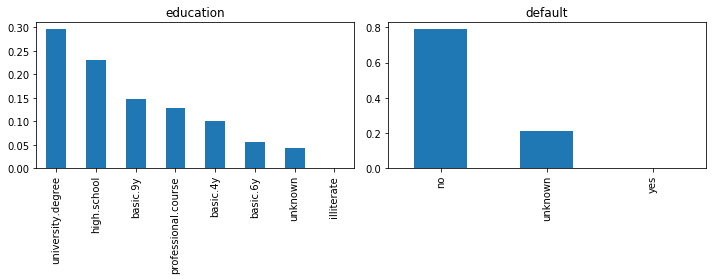

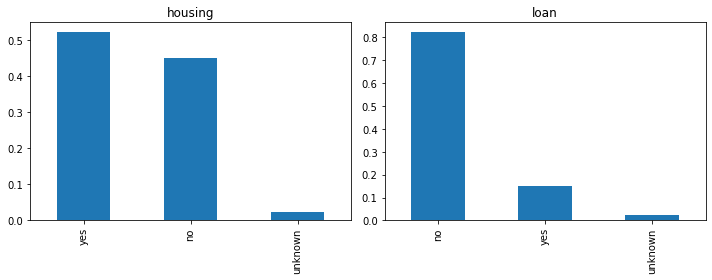

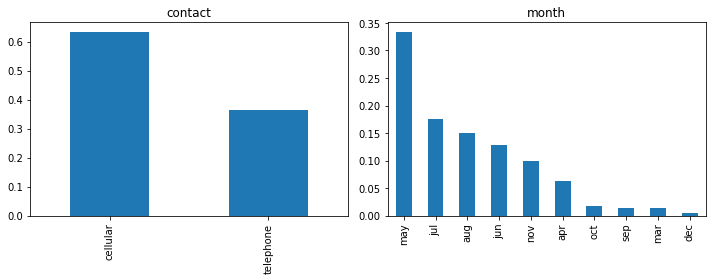

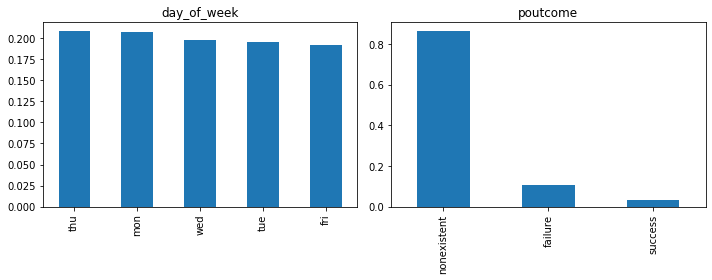

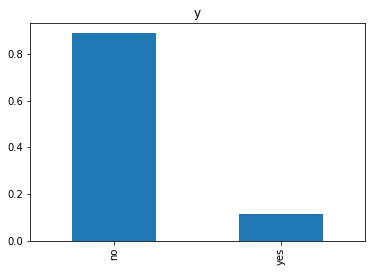

In [10]:
# EDA AND DATA VISUALISATIONS

# Function to perform univariate analysis of categorical columns
categorical_columns = dataframe.select_dtypes(include=['object']).columns
    
for i in range(0,len(categorical_columns),2):
        if len(categorical_columns) > i+1:
                
                plt.figure(figsize=(10,4))
                plt.subplot(121)
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
                plt.subplot(122)     
                dataframe[categorical_columns[i+1]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i+1])
                plt.tight_layout()
                plt.show()

        else:
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
        

In [11]:
# IMPUTING UNKNOWN VALUES OF CATEGORICAL COLUMNS

cols = list(dataframe)
for col in cols:
    if col in dataframe.select_dtypes(exclude=np.number).columns:
        dataframe[col]=dataframe[col].str.replace('unknown',dataframe[col].mode()[0])

dataframe.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,49,blue-collar,married,basic.9y,no,no,no,cellular,nov,wed,227,4,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,-1.7,94.215,-40.3,0.870,4991.6,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no


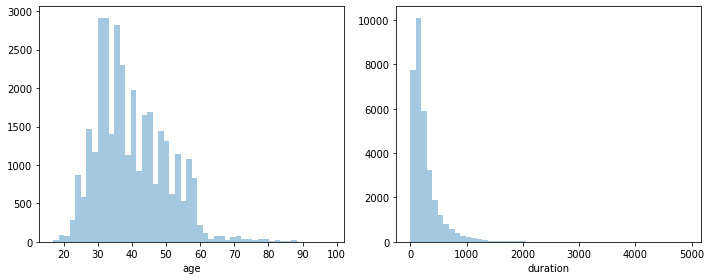

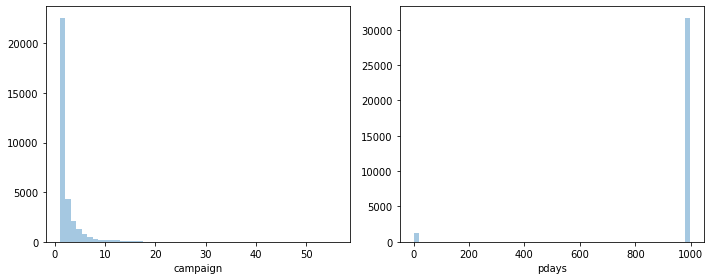

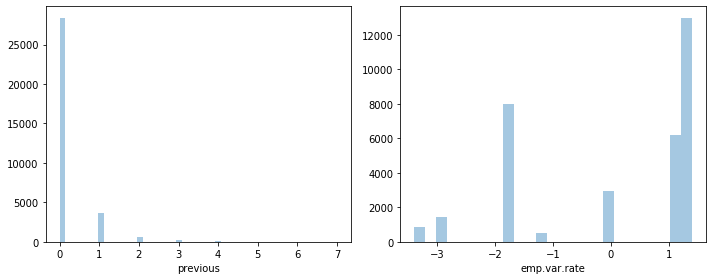

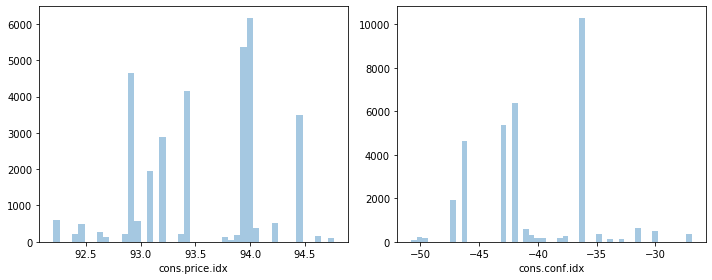

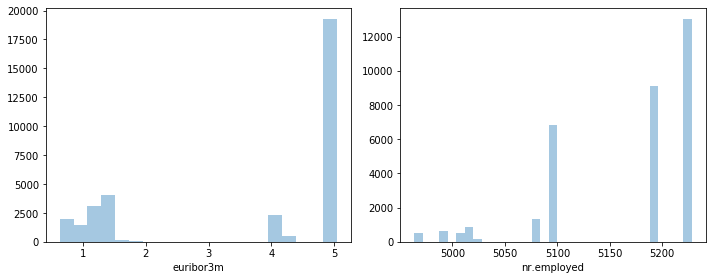

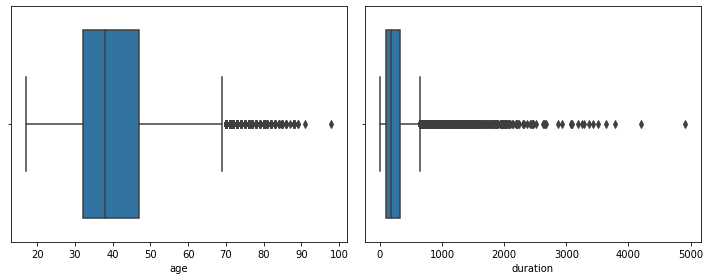

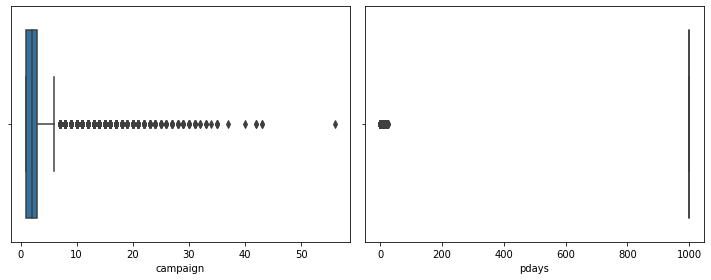

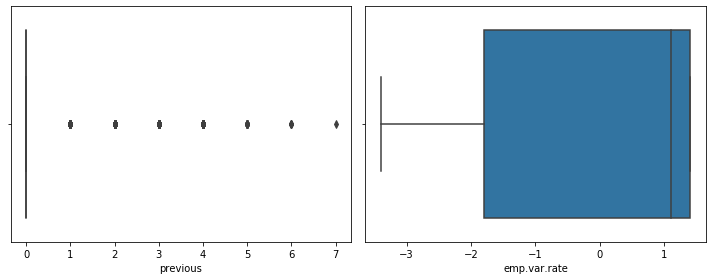

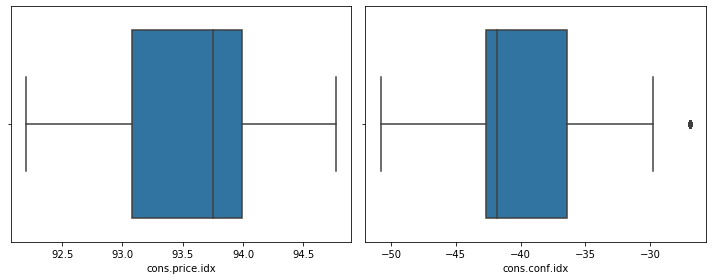

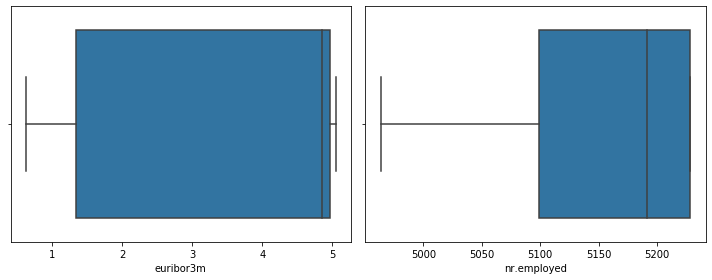

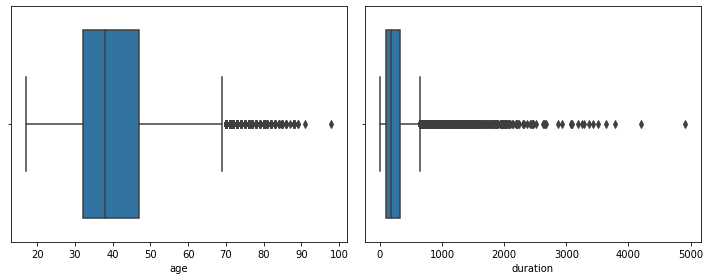

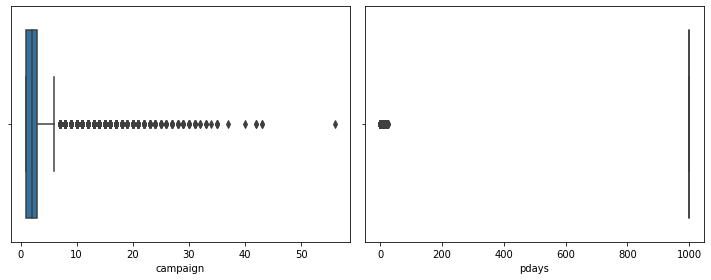

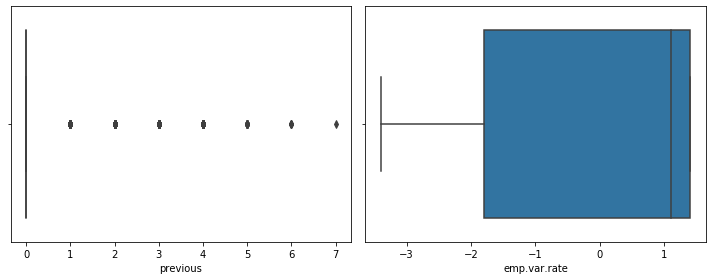

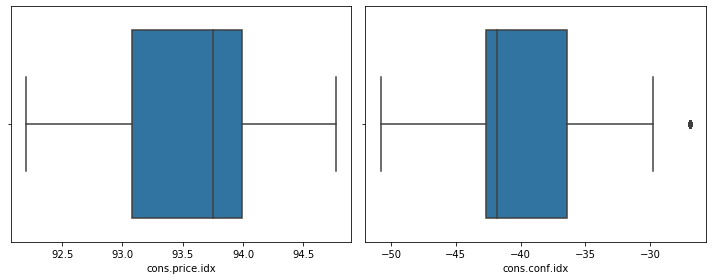

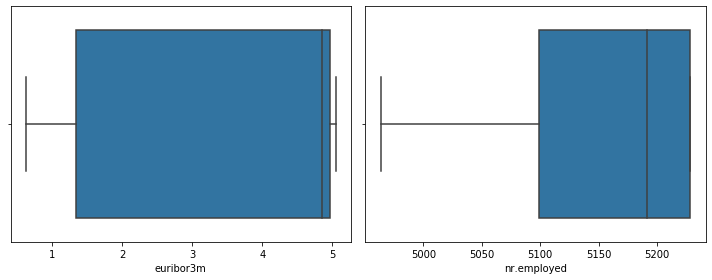

In [12]:
# univariate analysis of continous columns

# Code to plot histograms
numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
# dataframe = dataframe[numeric_columns]
    
for i in range(0,len(numeric_columns),2):
    if len(numeric_columns) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(dataframe[numeric_columns[i]], kde=False)
        plt.subplot(122)            
        sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(dataframe[numeric_columns[i]], kde=False)

# Code to plot boxplots
numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
# dataframe = dataframe[numeric_columns]
    
for i in range(0,len(numeric_columns),2):
    if len(numeric_columns) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(dataframe[numeric_columns[i]])
        plt.subplot(122)            
        sns.boxplot(dataframe[numeric_columns[i+1]])
        plt.tight_layout()
        plt.show()

    else:
        sns.boxplot(dataframe[numeric_columns[i]])

# Code to plot boxplots
numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
# dataframe = dataframe[numeric_columns]
    
for i in range(0,len(numeric_columns),2):
    if len(numeric_columns) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(dataframe[numeric_columns[i]])
        plt.subplot(122)            
        sns.boxplot(dataframe[numeric_columns[i+1]])
        plt.tight_layout()
        plt.show()

    else:
        sns.boxplot(dataframe[numeric_columns[i]])

In [13]:
# DROPPING THE COLUMNS PDAYS AND PREVIOUS

dataframe.drop(['pdays','previous'],1,inplace=True)

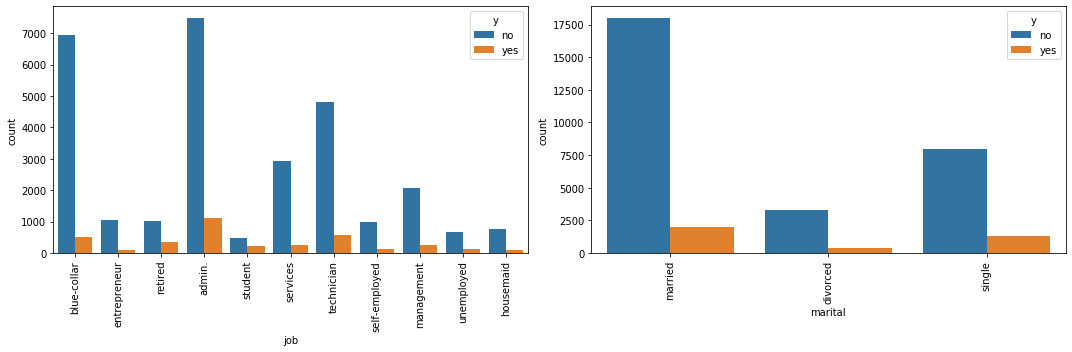

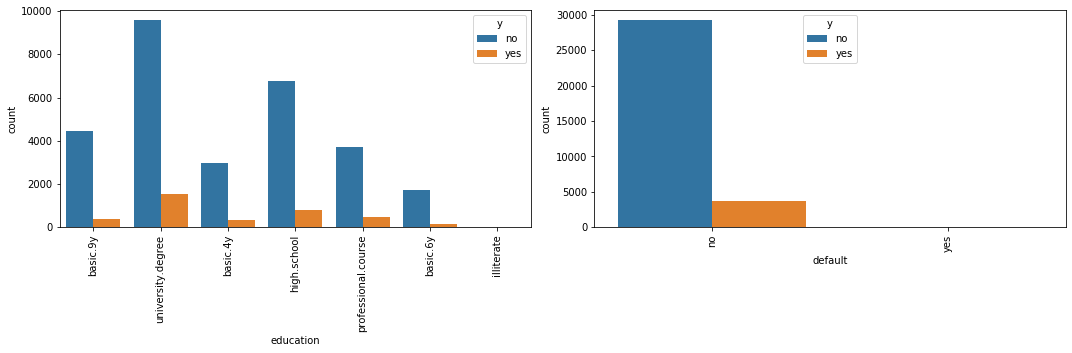

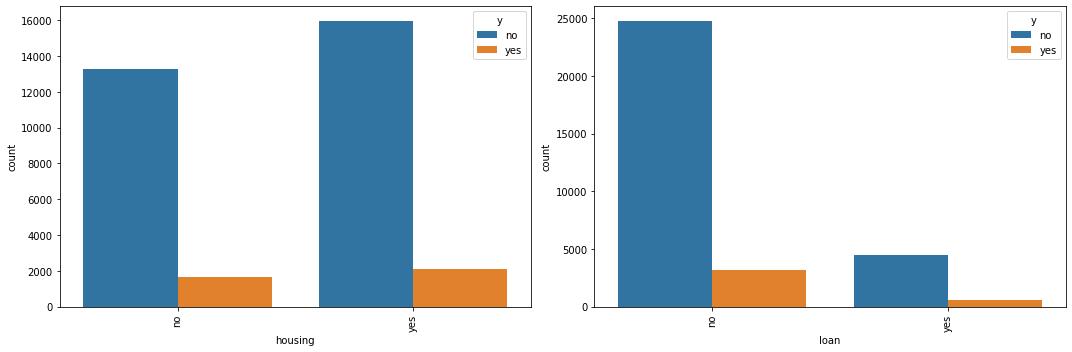

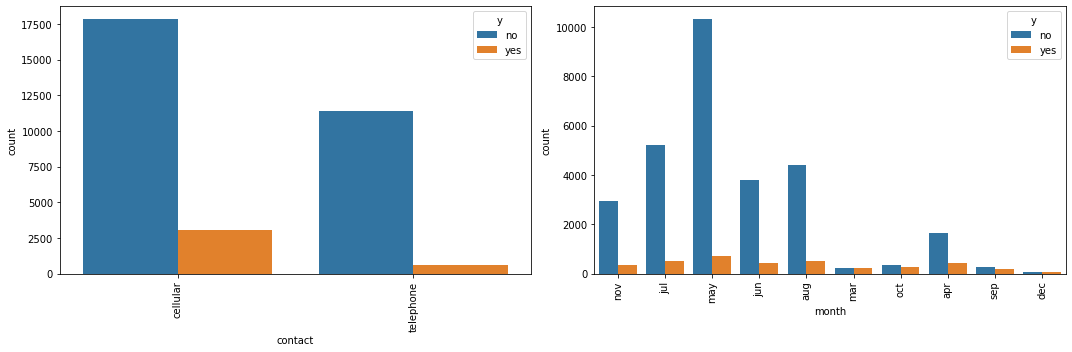

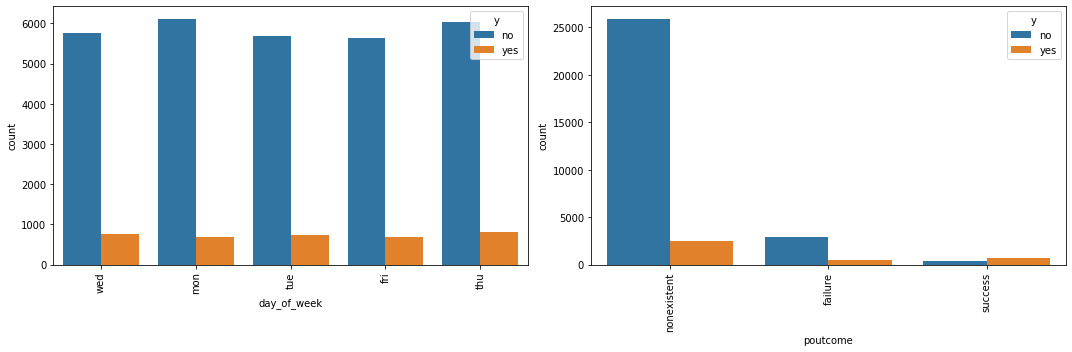

In [14]:
# BIVARIATE ANALYSIS-CATEGORICAL COLUMNS

%matplotlib inline
categorical_columns = dataframe.select_dtypes(exclude=np.number).columns
for i in range(0,len(categorical_columns),2):
    if len(categorical_columns) > i+1:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        sns.countplot(x=dataframe[categorical_columns[i]],hue=dataframe['y'],data=dataframe)
        plt.xticks(rotation=90)
        plt.subplot(122)            
        sns.countplot(dataframe[categorical_columns[i+1]],hue=dataframe['y'],data=dataframe)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()





In [15]:
# TREATING OUTLIERS IN CONTINOUS COLUMNS

# Function to treat outliers 
cols = list(dataframe)
for col in cols:
    if col in dataframe.select_dtypes(include=np.number).columns:
        dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))

# Now run the code snippet to check outliers again



In [16]:
# APLLYING VANILLA MODELS ON DATA

# FUNCTION TO LABEL TO ENCODE CATEGORICAL VARIABLES

# Initializing lable encoder
le = LabelEncoder()

# Code that auto encodes any dataframe column of type category or object.        
columnsToEncode = list(dataframe.select_dtypes(include=['category','object']))

# Initializing Label Encoder
le = LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for feature in columnsToEncode:
    try:
        dataframe[feature] = le.fit_transform(dataframe[feature])
    except:
        print('Error encoding '+feature)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5798
           1       0.60      0.34      0.43       792

    accuracy                           0.89      6590
   macro avg       0.76      0.65      0.69      6590
weighted avg       0.88      0.89      0.88      6590

ROC_AUC_SCORE is 0.6524066989313626


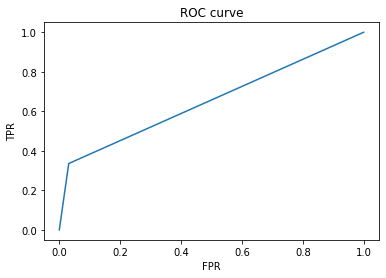

In [17]:
# FIT VANILLA CLASSIFICATION MODELS

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
# Predictors
X = dataframe.iloc[:,:-1]

# Target
y = dataframe.iloc[:,-1]

# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

# run Logistic Regression model
model = LogisticRegression()
# fitting the model
model.fit(x_train, y_train)
# predicting the values
y_scores = model.predict(x_val)

# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5798
           1       0.51      0.51      0.51       792

    accuracy                           0.88      6590
   macro avg       0.72      0.72      0.72      6590
weighted avg       0.88      0.88      0.88      6590

ROC_AUC_SCORE is 0.7238295772488597


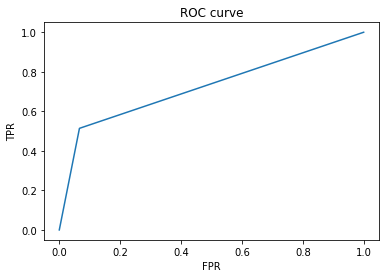

In [18]:
# Run Decision Tree Classifier
model = DecisionTreeClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5798
           1       0.60      0.34      0.43       792

    accuracy                           0.89      6590
   macro avg       0.76      0.65      0.69      6590
weighted avg       0.88      0.89      0.88      6590

ROC_AUC_SCORE is 0.6524066989313626


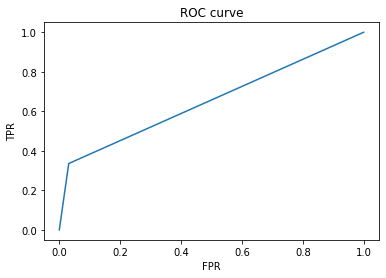

In [19]:
# Run Logistic Regression Classifier
model = LogisticRegression()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5798
           1       0.62      0.47      0.53       792

    accuracy                           0.90      6590
   macro avg       0.78      0.71      0.74      6590
weighted avg       0.89      0.90      0.90      6590

ROC_AUC_SCORE is 0.7146414559531151


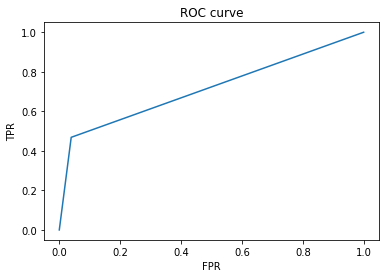

In [20]:
# run Random Forrest Classifier

model = RandomForestClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5798
           1       0.65      0.41      0.50       792

    accuracy                           0.90      6590
   macro avg       0.79      0.69      0.72      6590
weighted avg       0.89      0.90      0.89      6590

ROC_AUC_SCORE is 0.6879912874868032


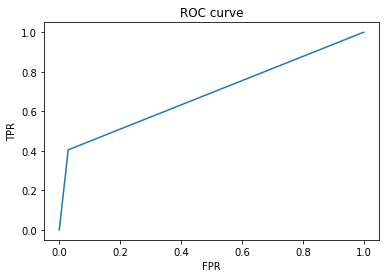

In [21]:
# Run XGBoost model
#import XGBoost
from xgboost import XGBClassifier
model = XGBClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5798
           1       0.65      0.44      0.52       792

    accuracy                           0.90      6590
   macro avg       0.79      0.70      0.73      6590
weighted avg       0.89      0.90      0.90      6590

ROC_AUC_SCORE is 0.7021356197365166


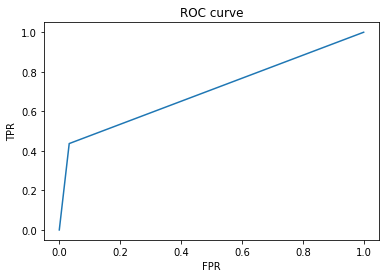

In [22]:
# Run Gradient Boosting model

model = GradientBoostingClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [23]:
# FEATURE SELECTION

#USING RFE FOR FEATURE SELECTION

models = LogisticRegression()
#   using  rfe and selecting 8 features
rfe = RFE(models,8)
#   fitting the model
rfe = rfe.fit(X,y)
#   ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for Logistic Regression model are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())
print('===='*30)




Features  to be selected for Logistic Regression model are:
['marital', 'contact', 'day_of_week', 'campaign', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'euribor3m']


In [24]:
# Selecting 8 number of features
# Random Forrest classifier model
models = RandomForestClassifier()
#   using  rfe and selecting 8 features
rfe = RFE(models,8)
#   fitting the model
rfe = rfe.fit(X,y)
#   ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for Random Forrest Classifier are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())
print('===='*30)


Features  to be selected for Random Forrest Classifier are:
['age', 'job', 'day_of_week', 'duration', 'campaign', 'poutcome', 'euribor3m', 'nr.employed']


In [25]:
# Selecting 8 number of features
# XGBoost classifier model
models = XGBClassifier()
#   using  rfe and selecting 8 features
rfe = RFE(models,8)
#   fitting the model
rfe = rfe.fit(X,y)
#   ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for XGBoost classifier are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())
print('===='*30)


Features  to be selected for XGBoost classifier are:
['month', 'duration', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


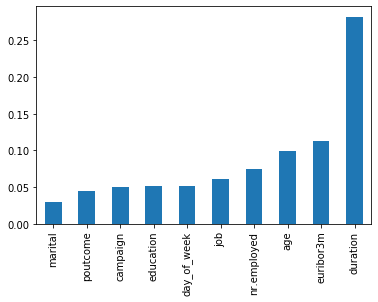

In [26]:
# FEATURE SELECTION USING RANDOM FOREST

# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# selecting the data
rfc = RandomForestClassifier(random_state=42)
# fitting the data
rfc.fit(X_train, y_train)
# predicting the data
y_pred = rfc.predict(X_test)
# feature importances
rfc_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values().tail(10)
# plotting bar chart according to feature importance
rfc_importances.plot(kind='bar')
plt.show()

In [27]:
# GRID SEARCH AND HYPERPARAMETER TUNING

#GRID SEARCH FOR RANDOM FOREST

# splitting the data
x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
# selecting the classifier
rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
# fitting the model
grid_search_model.fit(x_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8723
           1       0.43      0.86      0.57      1162

    accuracy                           0.85      9885
   macro avg       0.70      0.86      0.74      9885
weighted avg       0.91      0.85      0.87      9885

[[7396 1327]
 [ 160 1002]]


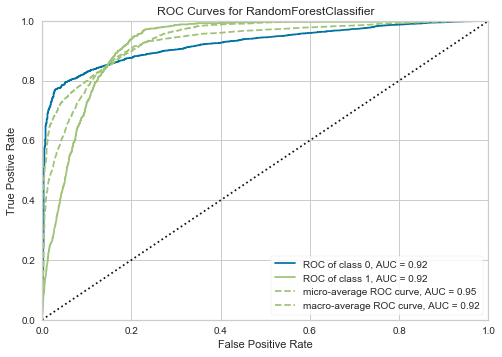

In [32]:
 # Applying the best parameters obtained using Grid Search on Random Forest mode
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc


# A function to use smote
def grid_search_random_forrest_best(dataframe,target):
    
    # splitting the data
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE()
    
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    rfc = RandomForestClassifier(n_estimators=11, max_features='auto', max_depth=8, criterion='entropy',random_state=42)
    
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(x_val)
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    visualizer = roc_auc(rfc,X_sm,y_sm,x_val,y_val)


grid_search_random_forrest_best(X,y)




              precision    recall  f1-score   support

           0       0.98      0.84      0.91      8723
           1       0.43      0.89      0.58      1162

    accuracy                           0.85      9885
   macro avg       0.70      0.87      0.74      9885
weighted avg       0.92      0.85      0.87      9885

[[7333 1390]
 [ 128 1034]]


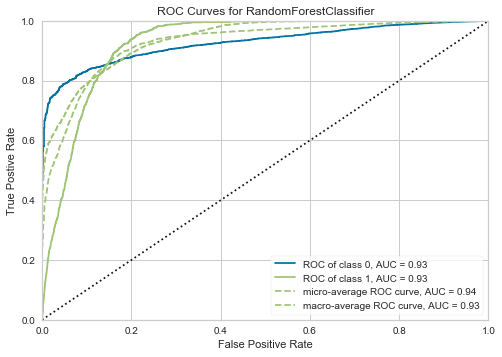

In [33]:
#Applying the grid search function for random forest only on the best features obtained using RFE

grid_search_random_forrest_best(X[['duration','euribor3m','age','nr.employed','job','day_of_week','campaign','education','emp.var.rate','poutcome']],y)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8723
           1       0.44      0.88      0.58      1162

    accuracy                           0.85      9885
   macro avg       0.71      0.86      0.75      9885
weighted avg       0.92      0.85      0.87      9885

[[7397 1326]
 [ 138 1024]]


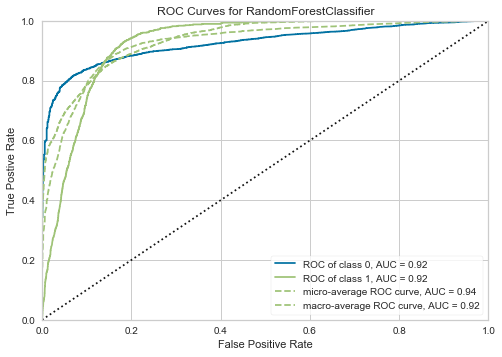

In [34]:
#Applying the grid search function for random forest only on the best features obtained using Random Forest

grid_search_random_forrest_best(X[['duration','euribor3m','age','nr.employed','job','day_of_week','campaign','education','marital','poutcome']],y)

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8723
           1       0.38      0.89      0.53      1162

    accuracy                           0.82      9885
   macro avg       0.68      0.85      0.71      9885
weighted avg       0.91      0.82      0.85      9885

[[7055 1668]
 [ 133 1029]]


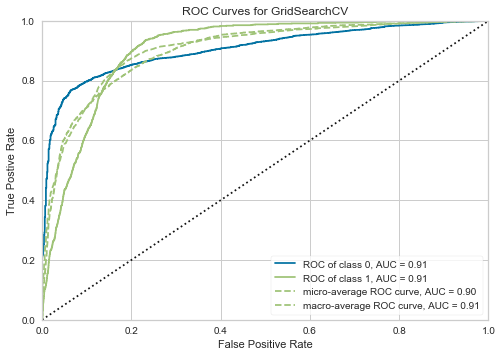

In [36]:
#Using Grid Search for Logistic Regression

# splitting the data into train and test set
x_train,x_val,y_train,y_val = train_test_split(X, y, test_size=0.3, random_state=42)
# Initializing smote
smote = SMOTE()
# applying smote
X_sm, y_sm =  smote.fit_sample(x_train, y_train)
# fitting logistic regression
log_reg = LogisticRegression()
# parameter grid
param_grid = { 
        'C' : np.logspace(-5, 8, 15)
            }
# initializing grid search model
grid_search = GridSearchCV(log_reg, param_grid=param_grid)
# Fitting the model 
grid_search.fit(X_sm, y_sm)
# predicting values
y_pred = grid_search.predict(x_val)
# printing classification report
print(classification_report(y_val, y_pred))
# print confusion matrix
print(confusion_matrix(y_val, y_pred))
# using visualizer
visualizer = roc_auc(grid_search,X_sm,y_sm,x_val,y_val)

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      8723
           1       0.45      0.86      0.59      1162

    accuracy                           0.86      9885
   macro avg       0.71      0.86      0.75      9885
weighted avg       0.92      0.86      0.88      9885

[[7501 1222]
 [ 164  998]]


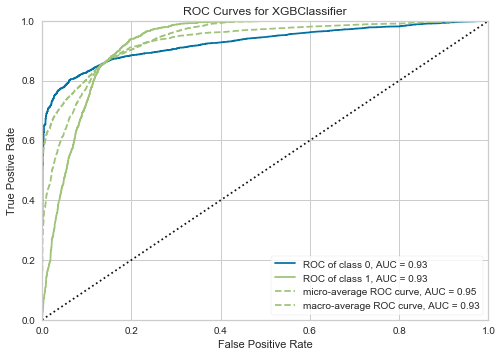

In [38]:
#Applying XGBoost model

# spiltting the data into train and test data
x_train,x_val,y_train,y_val = train_test_split(X, y, test_size=0.3, random_state=42)
# initializing smote
smote = SMOTE()
# applying smote
X_sm, y_sm =  smote.fit_sample(x_train, y_train)
# initializing XGBoost classifier
model = XGBClassifier(n_estimators=50, max_depth=4)
# fitting the model
model.fit(pd.DataFrame(X_sm,columns=x_train.columns), y_sm)
# predicting the model
y_pred = model.predict(x_val)
# printing classification report
print(classification_report(y_val, y_pred))
# printing confusion matrix
print(confusion_matrix(y_val, y_pred))
# using visualizer to 
visualizer = roc_auc(model,X_sm,y_sm,x_val,y_val)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      8723
           1       0.47      0.82      0.59      1162

    accuracy                           0.87      9885
   macro avg       0.72      0.85      0.76      9885
weighted avg       0.91      0.87      0.88      9885

[[7628 1095]
 [ 209  953]]


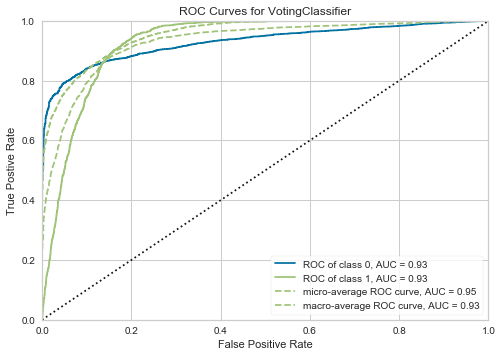

In [40]:
#ENSEMBLING

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier


# splitting the data  
x_train,x_val,y_train,y_val = train_test_split(X, y, test_size=0.3, random_state=42)
# using smote
smote = SMOTE()
X_sm, y_sm =  smote.fit_sample(x_train, y_train)
# models to use for ensembling  
model1 = RandomForestClassifier()
model3 = GradientBoostingClassifier()
model2 = LogisticRegression()
# fitting the model
model = VotingClassifier(estimators=[('rf', model1), ('lr', model2), ('xgb',model3)], voting='soft')
model.fit(X_sm,y_sm)
# predicting balues and getting the metrics
y_pred = model.predict(x_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
visualizer = roc_auc(model,X_sm,y_sm,x_val,y_val)

In [52]:
# PREDICTION THE TEST DATA

# Actual Test File
test = pd.read_csv('C:\\Users\\KARISHMA\\Desktop\\data\\train.csv')

# Storing the Id column
Id = test[['Id']]

# Preprocessed Test File
test = pd.read_csv('C:\\Users\\KARISHMA\\Desktop\\data\\train.csv')
test.drop('Id',1,inplace=True)
test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,-1.7,94.215,-40.3,0.870,4991.6,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no
